In [50]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

### **Reading the Dataset**

stops: The number of police stops between January 1998 and March 1999<br>
past.arrests: The number of arrests that took place in 1997<br>
precinct: Index for the precinct (1 - 75)<br>
eth: Indicator for ethinicity, black (1), hispanic (2), white (3)<br>
crime: Indicator for type of crime, violent (1), weapons (2), property (3), drug (4). 

In [51]:
url = "http://www.stat.columbia.edu/~gelman/arm/examples/police/frisk_with_noise.dat"
df = pd.read_csv(url, skiprows=6, delimiter=" ")
df.head()

,stops,pop,past.arrests,precinct,eth,crime
0,75,1720,191,1,1,1
1,36,1720,57,1,1,2
2,74,1720,599,1,1,3
3,17,1720,133,1,1,4
4,37,1368,62,1,2,1


### **Data Pre-processing**

#### Removing Multi-Colinearlity 
- We do this by one-hot encoding. We have to remember that the type of data is a nominal data where there is not order assigned to the attributes 

In [52]:
#introducing black column
df['black'] = df['eth']
df['black'].replace({1:1, 2:0, 3:0}, inplace=True)

#introducing hispanic column
df['hispanic'] = df['eth']
df['hispanic'].replace({1:0, 2:1, 3:0}, inplace=True)

#introducing white column
df['white'] = df['eth']
df['white'].replace({1:0, 2:0, 3:1}, inplace=True)

#introducing violent column
df['violent'] = df['crime']
df['violent'].replace({1:1, 2:0, 3:0, 4:0}, inplace=True)

#introducing weapons column
df['weapons'] = df['crime']
df['weapons'].replace({1:0, 2:1, 3:0, 4:0}, inplace=True)

#introducing property column
df['property'] = df['crime']
df['property'].replace({1:0, 2:0, 3:1, 4:0}, inplace=True)

#introducing drug column
df['drug'] = df['crime']
df['drug'].replace({1:0, 2:0, 3:0, 4:1}, inplace=True)

In [53]:
df.head()

,stops,pop,past.arrests,precinct,eth,crime,black,hispanic,white,violent,weapons,property,drug
0,75,1720,191,1,1,1,1,0,0,1,0,0,0
1,36,1720,57,1,1,2,1,0,0,0,1,0,0
2,74,1720,599,1,1,3,1,0,0,0,0,1,0
3,17,1720,133,1,1,4,1,0,0,0,0,0,1
4,37,1368,62,1,2,1,0,1,0,1,0,0,0


### **Train and Test**

In [54]:
from sklearn.linear_model import PoissonRegressor 
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(df[['black', 'hispanic', 'white', 'violent', 'weapons', 'property', 'drug']], 
                 df['stops'], test_size=0.2)

In [56]:
poisson = PoissonRegressor()

In [57]:
poisson.fit(X_train, y_train)

PoissonRegressor()

In [58]:
poisson.coef_

array([ 0.63252398,  0.15587693, -0.78841253,  0.09654282,  0.73994061,
       -0.16804112, -0.66845392])

In [59]:
poisson.intercept_

4.703792054758938

Average Observed Count = exp(intercept) = exp(4.7199) = 112.15<br><br>

##### Ethinicity 

Blacks have 1.84 (84%) times more stops than non-Blacks<br>
Hispanics have 1.20 (20%) times more stops than non-Hispanics<br>
Whites have 0.45 (55%) times less stops than non-Whites<br>

##### Crime 

Violent Crimes are associated with 1.05 (5%) times more crimes<br>
Weapon Crimes are associated with 1.99 (99%) times more crimes<br>
Property Crimes are associated with 0.89 (11%) times less crimes<br>
Drug Crimes are associated with 0.53 (47%) times less crimes<br>

In [60]:
y_pred = poisson.predict(X_test)

In [61]:
y_test = y_test.to_numpy()
error = np.subtract(y_pred, y_test)

### **Error**

In [62]:
error.mean()

4.1827467046943685

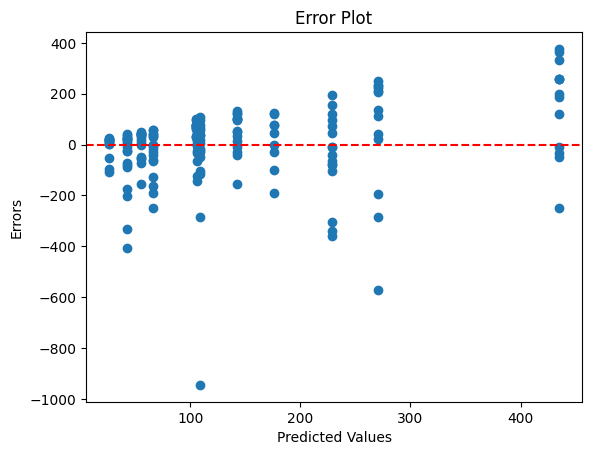

In [63]:
#plotting errors
plt.figure()
plt.scatter(y_pred, error)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Errors')
plt.title('Error Plot')
plt.show()

In [64]:
import statsmodels.api as sm

In [65]:
poisson_reg = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

In [66]:
print(poisson_reg.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  stops   No. Observations:                  720
Model:                            GLM   Df Residuals:                      714
Model Family:                 Poisson   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -50956.
Date:                Thu, 30 May 2024   Deviance:                       97658.
Time:                        13:28:53   Pearson chi2:                 1.22e+05
No. Iterations:                   100   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
black          3.3279      0.004    848.508      0.0